## Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
import scipy.cluster.hierarchy
import scipy.spatial.distance
import scipy.stats as sts
import seaborn as sns
import numpy.linalg as nl
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
features = ['X1','X2','X3','X4','X5','X6','X7','X8','X9']
f_len = len(features)

## Импорт данных

In [4]:
data = pd.read_excel(r'data\data.xlsx', index_col='Наименование субъекта')
data.head()

x1     x2        x3        x4        x5         x6  \
Наименование субъекта                                                         
Алтайский край          9.1  71.61  0.026759  0.009063  1.376780  20.276651   
Амурская область       10.0  68.66  0.011392  0.017722  2.501266  18.326582   
Архангельская область   9.0  72.34  0.019366  0.031690  0.757923  18.470951   
Астраханская область   10.9  73.86  0.028827  0.013917  1.332008  14.683897   
Белгородская область    8.5  74.21  0.023886  0.009038  0.694642  21.408005   

                          x7          x8          x9  
Наименование субъекта                                 
Алтайский край         18.33  237.364221   49.792404  
Амурская область       26.41  381.100506  430.296203  
Архангельская область  29.19  721.168134  167.017606  
Астраханская область   21.56  550.095129   95.087475  
Белгородская область   26.07  559.056811  108.048418

## Стандартизация данных

In [5]:
index = data.index
columns = data.columns
scaled = (data - data.mean(axis=0))/data.std()
scaled_data = pd.DataFrame(scaled, columns=columns, index=index)
scaled_data.head()

x1        x2        x3        x4        x5  \
Наименование субъекта                                                     
Алтайский край        -0.467649 -0.456302  0.268870 -0.699761  0.182642   
Амурская область      -0.065229 -1.690716 -0.990986 -0.092843  2.274442   
Архангельская область -0.512362 -0.150837 -0.337230  0.886336 -0.968575   
Астраханская область   0.337191  0.485200  0.438446 -0.359569  0.099355   
Белгородская область  -0.735929  0.631655  0.033371 -0.701538 -1.086291   

                             x6        x7        x8        x9  
Наименование субъекта                                          
Алтайский край        -0.207484 -0.797236 -0.411657 -0.394254  
Амурская область      -0.450501  0.254454 -0.267659  0.899483  
Архангельская область -0.432510  0.616298  0.073029  0.004319  
Астраханская область  -0.904452 -0.376820 -0.098356 -0.240248  
Белгородская область  -0.066495  0.210200 -0.089378 -0.196180

In [6]:
mod_pca = PCA(n_components=2)
mod_pca.fit(scaled_data)

PCA(n_components=2)

In [7]:
mod_pca.score_samples(scaled_data)

array([ -8.65454993, -14.77914599,  -9.6129868 ,  -8.490942  ,
        -9.62970097, -17.75134428,  -9.55977379, -11.78736783,
       -11.97279909,  -8.73651635, -27.02485872, -18.31452404,
        -9.34528005, -19.43267493, -12.45497416,  -9.74115373,
       -10.50997549, -10.60955242, -13.55005579,  -8.42102783,
       -10.94543768, -10.94132252, -11.14368949,  -9.19444976,
        -8.80727906,  -9.13694266,  -9.96007422,  -9.93141947,
        -9.65819303,  -9.67362828,  -8.91663503, -14.44231968,
        -9.87423543, -10.63452191, -31.78908146,  -8.71041348,
        -8.84445168, -11.28640437,  -8.71956338, -14.73963454,
        -9.83148489,  -9.85685217,  -8.98824369, -12.24563702,
        -9.50888536,  -9.70212242, -18.90466393,  -8.70725356,
       -10.18567669, -16.14870353, -26.48038823, -11.46307596,
       -12.01735128, -15.31090567,  -9.24861318,  -9.45767287,
       -12.0145986 , -11.95742458, -25.77329478,  -9.2146414 ,
       -29.49268327, -12.30016444,  -9.48357444,  -8.60

In [8]:
correlation = scaled_data.corr() #корреляционная матрица
correlation

x1        x2        x3        x4        x5        x6        x7  \
x1  1.000000  0.213093 -0.043380  0.105091  0.081628 -0.220474 -0.038171   
x2  0.213093  1.000000 -0.012287 -0.083331 -0.384093 -0.038851  0.004326   
x3 -0.043380 -0.012287  1.000000  0.275532  0.197437 -0.070878  0.032258   
x4  0.105091 -0.083331  0.275532  1.000000  0.020829 -0.012319  0.003618   
x5  0.081628 -0.384093  0.197437  0.020829  1.000000 -0.039528 -0.017021   
x6 -0.220474 -0.038851 -0.070878 -0.012319 -0.039528  1.000000  0.627177   
x7 -0.038171  0.004326  0.032258  0.003618 -0.017021  0.627177  1.000000   
x8  0.226327  0.024706  0.070955  0.051996 -0.087294  0.115529  0.470741   
x9  0.232855 -0.001024  0.018910  0.026378 -0.094451  0.034849  0.389916   

          x8        x9  
x1  0.226327  0.232855  
x2  0.024706 -0.001024  
x3  0.070955  0.018910  
x4  0.051996  0.026378  
x5 -0.087294 -0.094451  
x6  0.115529  0.034849  
x7  0.470741  0.389916  
x8  1.000000  0.975433  
x9  0.975433  1.000000

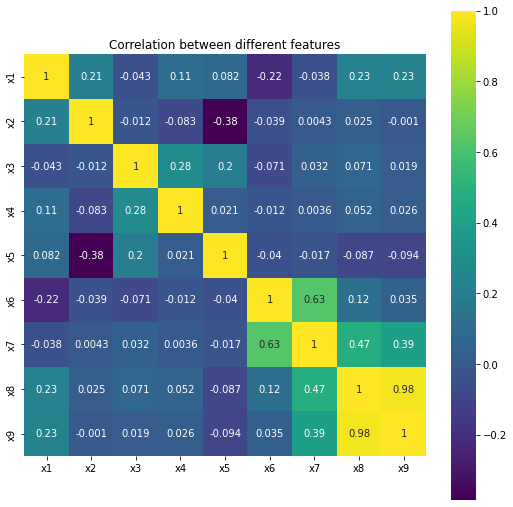

In [9]:
plt.figure(figsize=(9,9)) 
sns.heatmap(correlation, vmax=1, square=True, annot=True,cmap='viridis')
plt.title('Correlation between different features')
plt.show()

In [10]:
# проверка гипотезы о незначимости корреляционной матрицы
eigenvalues, eigenvector = np.linalg.eig(correlation)
couple_lst = []
for i in range(len(eigenvalues)):
    couple_lst.append((eigenvalues[i], eigenvector[:, i]))

couple_lst = sorted(couple_lst, key=lambda x: x[0], reverse=True)
eigenvalues_sorted = sorted(eigenvalues, reverse=True)

In [11]:
eigenvalues_sorted

[2.42099668724782,
 1.5767315289838424,
 1.4993623167202363,
 1.128765421568446,
 0.8767361332067698,
 0.8017766366727689,
 0.3984578346059277,
 0.2792095334606993,
 0.01796390753349436]

In [12]:
import math

def chi_2(n, k, R):
    return -(n-1/6*(2*k+5))*math.log(np.linalg.det(R))

chi2_z = chi_2(scaled_data.shape[0], scaled_data.shape[1], correlation)
p_value =sts.chi2.sf(chi2_z, scaled_data.shape[1]* (scaled_data.shape[1]-1) / 2)
print("Статистика критерия: ", chi2_z)
print("Достигаемый уровень значимости: ", p_value)
if p_value > 0.05:
    print("Гипотеза принимается, матрица парных коэффициентов корреляции незначима.")
else:
    print('Гипотеза отклоняется, матрица парных коэффициентов корреляции значима.')

Статистика критерия:  381.65489609370536
Достигаемый уровень значимости:  2.425489307767509e-59
Гипотеза отклоняется, матрица парных коэффициентов корреляции значима.


In [13]:
#Доверительные интервалы
def eigenval_left(l, n):
    return l / (1 + sts.norm.ppf(0.975) * math.sqrt(2/(n-1)))

def eigenval_right(l, n):
    return  l / (1 - sts.norm.ppf(0.975) * math.sqrt(2/(n-1)))

conf_interval = np.empty((f_len, 3))
for i in range(conf_interval.shape[0]):
    conf_interval[i, 0] = eigenval_left(eigenvalues_sorted[i], scaled_data.shape[0])
    conf_interval[i, 1] = eigenvalues_sorted[i]
    conf_interval[i, 2] = eigenval_right(eigenvalues_sorted[i], scaled_data.shape[0])

print('Доверительные интервалы для собственных значений корреляционной матрицы:')
conf_interval_df = pd.DataFrame(conf_interval, columns=["left_border", "eig", "right_border"])
conf_interval_df

Доверительные интервалы для собственных значений корреляционной матрицы:


left_border       eig  right_border
0     1.858832  2.420997      3.470610
1     1.210608  1.576732      2.260317
2     1.151205  1.499362      2.149405
3     0.866662  1.128765      1.618137
4     0.673155  0.876736      1.256841
5     0.615601  0.801777      1.149384
6     0.305934  0.398458      0.571208
7     0.214376  0.279210      0.400260
8     0.013793  0.017964      0.025752

In [14]:
#Проверка гипотезы о кратности собственных чисел

N = 85 # Число наблюдений
r = 2 # Число кратных корней
z = (N - 1) * sum(np.log(eigenvalues_sorted[:2])) + (N - 1) * r * np.log(1 / r * sum(eigenvalues_sorted[:2]))
n = r * (r + 1) / 2 - 1 # Число степеней свободы
p_val = 2 * min(sts.chi2.cdf(z, n), sts.chi2.sf(z, n))
print("Достигаемый уровень значимости: ",p_val)
if p_val > 0.05:
    print(f"Гипотеза о кратности собственных чисел принимается")
else:
    print(f"Гипотеза о кратности собственных чисел отвергается")

Достигаемый уровень значимости:  3.9962582760902135e-50
Гипотеза о кратности собственных чисел отвергается


In [15]:
# оценка уровня информативности
pc = 2
lmbd = 0

'''for i in range(pc):
    lmbd = lmbd + eigenvalues_sorted[i]

I = lmbd * 100 / f_len'''

for i in range(4):
    lmbd = lmbd + eigenvalues_sorted[i]
    I = lmbd * 100 / f_len
    print(f"Оценка информативности для {i + 1} главных компонент:")
    print('I(x) = {:.3f}%'.format(I))

Оценка информативности для 1 главных компонент:
I(x) = 26.900%
Оценка информативности для 2 главных компонент:
I(x) = 44.419%
Оценка информативности для 3 главных компонент:
I(x) = 61.079%
Оценка информативности для 4 главных компонент:
I(x) = 73.621%


In [16]:
# Критерий Кайзера
print("Критерий Кайзера: ", len(eigenvalues[eigenvalues > 1]))
if len(eigenvalues[eigenvalues > 1]) >= pc:
    print(f"Гипотеза о достаточности {pc} главных компонент принимается")
else:
    print(f"Гипотеза о достаточности {pc} главных компонент отвергается")

Критерий Кайзера:  4
Гипотеза о достаточности 2 главных компонент принимается


In [17]:
# матрица дисперсий
dispersion = np.empty(len(eigenvalues))
eigenvalues_sum = eigenvalues.sum()

for i in range(dispersion.shape[0]):
    dispersion[i] = eigenvalues[i] / eigenvalues_sum 

var = map(lambda x: x / eigenvalues_sum, eigenvalues_sorted)
df = pd.DataFrame(
    zip(
        eigenvalues_sorted,
        range(1, len(eigenvalues_sorted) + 1),
        map(lambda x: round(x / eigenvalues_sum, 2), eigenvalues_sorted)
    ),
    columns=["eig", "number", "variance_share"]
)
df

eig  number  variance_share
0  2.420997       1            0.27
1  1.576732       2            0.18
2  1.499362       3            0.17
3  1.128765       4            0.13
4  0.876736       5            0.10
5  0.801777       6            0.09
6  0.398458       7            0.04
7  0.279210       8            0.03
8  0.017964       9            0.00

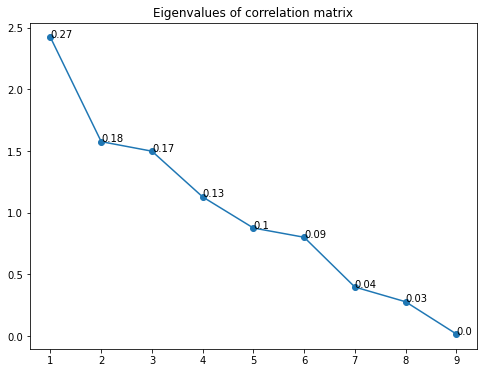

In [18]:
plt.figure(figsize=(8, 6))
plt.title('Eigenvalues of correlation matrix')
plt.plot(df['number'], df['eig'], marker='o')
ax = plt.gca()
df.apply(lambda x: ax.annotate(x['variance_share'], (x['number'], x['eig'])), axis=1)
plt.show()

In [19]:
result = pd.concat([df, np.cumsum(df[['eig', 'variance_share']])], axis=1)
result.columns = list(df.columns) + ['cum_eig', 'cum_variance_share']
result

eig  number  variance_share   cum_eig  cum_variance_share
0  2.420997       1            0.27  2.420997                0.27
1  1.576732       2            0.18  3.997728                0.45
2  1.499362       3            0.17  5.497091                0.62
3  1.128765       4            0.13  6.625856                0.75
4  0.876736       5            0.10  7.502592                0.85
5  0.801777       6            0.09  8.304369                0.94
6  0.398458       7            0.04  8.702827                0.98
7  0.279210       8            0.03  8.982036                1.01
8  0.017964       9            0.00  9.000000                1.01

In [20]:
u = np.empty((f_len, f_len))  # Матрица U главных компонент
for i in range(f_len):
    u[i] = couple_lst[i][1]  # Достаем главные компоненты
    # - собственные вектора корреляционный матрицы
# Создадим фрейм
u = pd.DataFrame(
    data=u.T,
    columns=['Factor_' + str(i) for i in range(f_len)],
    index=features
)
# u['Factor_0']=u['Factor_0']*(-1)
u['Factor_1']=u['Factor_1']*(-1)
u['Factor_2']=u['Factor_2']*(-1)
u['Factor_3']=u['Factor_3']*(-1)
u['Factor_4']=u['Factor_4']*(-1)
u['Factor_5']=u['Factor_5']*(-1)
u['Factor_6']=u['Factor_6']*(-1)
# u['Factor_7']=u['Factor_7']*(-1)
# u['Factor_8']=u['Factor_8']*(-1)
u 

Factor_0  Factor_1  Factor_2  Factor_3  Factor_4  Factor_5  Factor_6  \
X1 -0.144169  0.525284  0.048490 -0.077403  0.675116 -0.155286 -0.461221   
X2 -0.047247  0.295610 -0.490644  0.440662  0.278565  0.354040  0.519536   
X3 -0.027477  0.049303  0.485564  0.503381 -0.127446  0.601665 -0.349138   
X4 -0.043670  0.108605  0.398160  0.572475 -0.014220 -0.649254  0.277409   
X5  0.087562 -0.109928  0.579824 -0.354857  0.430381  0.230839  0.525935   
X6 -0.244321 -0.610028 -0.125761  0.179208  0.311748 -0.091561 -0.108313   
X7 -0.462947 -0.401034 -0.031436  0.114441  0.256196  0.057360 -0.054179   
X8 -0.600738  0.171861  0.073914 -0.117099 -0.198214  0.043407  0.111156   
X9 -0.575982  0.218822  0.064426 -0.184004 -0.250671  0.012906  0.121960   

    Factor_7  Factor_8  
X1  0.047824 -0.006497  
X2  0.046005 -0.022165  
X3  0.078756 -0.036141  
X4 -0.035172 -0.010648  
X5  0.054556 -0.005610  
X6  0.633737 -0.036298  
X7 -0.732703 -0.045295  
X8  0.145518  0.718121  
X9  0.159778 -0.692061

In [21]:
A = u @ np.diag(np.sqrt(eigenvalues_sorted)) 
A.index = features
A

0         1         2         3         4         5         6  \
X1 -0.224321  0.659588  0.059375 -0.082236  0.632139 -0.139046 -0.291139   
X2 -0.073515  0.371192 -0.600786  0.468174  0.260832  0.317014  0.327950   
X3 -0.042752  0.061908  0.594566  0.534809 -0.119333  0.538743 -0.220388   
X4 -0.067949  0.136373  0.487541  0.608217 -0.013315 -0.581355  0.175110   
X5  0.136242 -0.138034  0.709985 -0.377012  0.402984  0.206697  0.331989   
X6 -0.380153 -0.766000 -0.153993  0.190396  0.291903 -0.081986 -0.068371   
X7 -0.720324 -0.503571 -0.038493  0.121586  0.239887  0.051361 -0.034200   
X8 -0.934721  0.215802  0.090507 -0.124410 -0.185596  0.038867  0.070166   
X9 -0.896202  0.274770  0.078888 -0.195492 -0.234713  0.011556  0.076985   

           7         8  
X1  0.025270 -0.000871  
X2  0.024309 -0.002971  
X3  0.041615 -0.004844  
X4 -0.018585 -0.001427  
X5  0.028827 -0.000752  
X6  0.334868 -0.004865  
X7 -0.387162 -0.006071  
X8  0.076892  0.096249  
X9  0.084427 -0.092757

In [22]:
u = u.iloc[:, :pc]
sqrt_l = np.eye(pc)
for i in range(pc):
    sqrt_l[i][i] = math.sqrt(eigenvalues_sorted[i])
A = np.dot(u, sqrt_l)
A = pd.DataFrame(
    data=A,
    columns=['Factor_' + str(i+1) for i in range(pc)],
    index=features
)
A

Factor_1  Factor_2
X1 -0.224321  0.659588
X2 -0.073515  0.371192
X3 -0.042752  0.061908
X4 -0.067949  0.136373
X5  0.136242 -0.138034
X6 -0.380153 -0.766000
X7 -0.720324 -0.503571
X8 -0.934721  0.215802
X9 -0.896202  0.274770

In [23]:
# Матрица индивидуальных значений главных компонент
F = (np.linalg.inv(A.T @ A) @ A.T @ (scaled_data.values).T).T
F.columns = ['Factor_' + str(i + 1) for i in range(pc)]
F = F.sort_values("Factor_1", ascending=False)
F = F.iloc[:, :pc] # Берем первые pc главных компонент
F = F.sort_index()
F

Factor_1  Factor_2
0   0.657021 -0.138637
1  -0.029115 -0.413658
2  -0.166623 -0.077595
3   0.343009  0.737113
4   0.062006 -0.204672
..       ...       ...
80  0.297243  3.703588
81  0.646015  0.505184
82 -1.082501 -0.353210
83 -4.270235  2.001295
84  0.119080 -0.604179

[85 rows x 2 columns]

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
new = pca.transform(scaled_data)

In [79]:
del F

In [80]:
# Загружаем метки классов, полученные на 1 лабе для метода Уорда и К-средних

#classes = pd.read_excel('C:/Users/Яна/Desktop/Python/Ec/cluster_res_old.xlsx', index_col=0)
classes = pd.read_excel(r'data\classes_old.xlsx')
F = pd.DataFrame(index = classes.index)
F['Factor_1'] = new[:, 0] * (-1)
F['Factor_2'] = new[:, 1]
F['ward_old'] = classes.ward_old.values
F['kmeans_old'] = classes.kmeans_old.values
F

Factor_1  Factor_2  ward_old  kmeans_old
0   1.022295 -0.174084         5           3
1  -0.045302 -0.519421         7           1
2  -0.259258 -0.097435         5           3
3   0.533707  0.925578         5           3
4   0.096479 -0.257002         5           3
..       ...       ...       ...         ...
80  0.462497  4.650520         4           2
81  1.005171  0.634349         5           3
82 -1.684324 -0.443519         3           4
83 -6.644295  2.512985         1           6
84  0.185283 -0.758656         5           3

[85 rows x 4 columns]

## Кластеризация

In [81]:
# Кластеризация
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy

In [82]:
F.iloc[:, :pc]

Factor_1  Factor_2
0   1.022295 -0.174084
1  -0.045302 -0.519421
2  -0.259258 -0.097435
3   0.533707  0.925578
4   0.096479 -0.257002
..       ...       ...
80  0.462497  4.650520
81  1.005171  0.634349
82 -1.684324 -0.443519
83 -6.644295  2.512985
84  0.185283 -0.758656

[85 rows x 2 columns]

Text(0.5, 1.0, 'ward method')

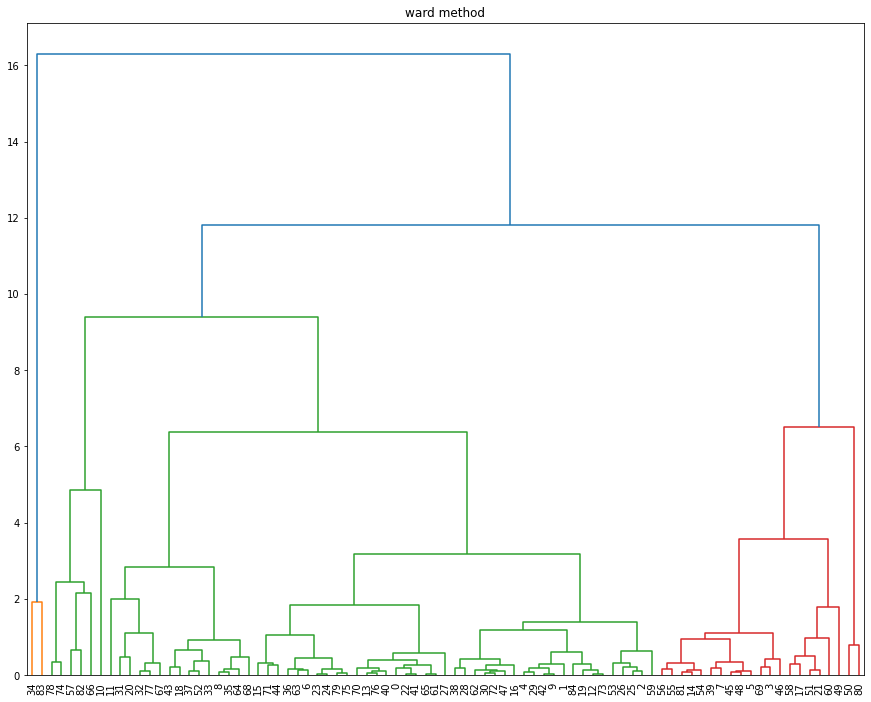

In [87]:
Z = hierarchy.linkage(F.iloc[:, :pc], method='ward', optimal_ordering=True)
    #строим дендрограмму

plt.figure(figsize=(15,12)) # задаем размеры окна с графиками

hierarchy.dendrogram(Z, labels=F.index, leaf_font_size=10, p = 3)

# Z - результат кластеризации, labels - названия строк (ось Х), leaf_font_size - размер шрифта

plt.title('{} method'.format('ward'))
# plt.savefig('saved_figure4.pdf')

In [88]:
n_clusters = 7
ward = AgglomerativeClustering(n_clusters=n_clusters , linkage='ward')
ward.fit(F.iloc[:, :pc])

kmeans = KMeans(n_clusters=n_clusters , random_state=36)
kmeans.fit(F.iloc[:, :pc])

F['ward_new'] = ward.labels_
F['kmeans_new'] = kmeans.labels_

F['ward_new'] = F['ward_new']+1
F['kmeans_new'] = F['kmeans_new']+1

F

Factor_1  Factor_2  ward_old  kmeans_old  ward_new  kmeans_new
0   1.022295 -0.174084         5           3         2           4
1  -0.045302 -0.519421         7           1         2           7
2  -0.259258 -0.097435         5           3         2           4
3   0.533707  0.925578         5           3         1           6
4   0.096479 -0.257002         5           3         2           4
..       ...       ...       ...         ...       ...         ...
80  0.462497  4.650520         4           2         5           3
81  1.005171  0.634349         5           3         1           6
82 -1.684324 -0.443519         3           4         6           1
83 -6.644295  2.512985         1           6         4           2
84  0.185283 -0.758656         5           3         2           7

[85 rows x 6 columns]

## Сравнение графиков

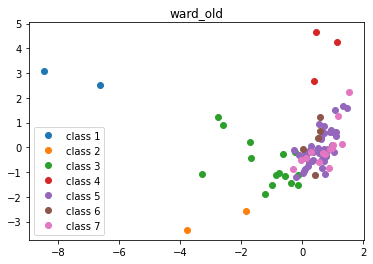

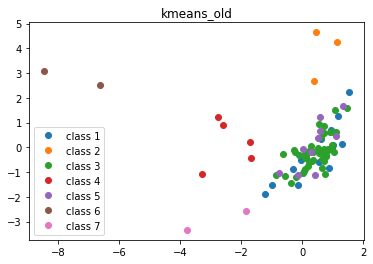

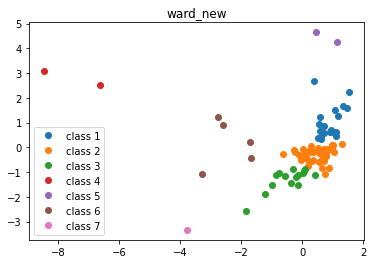

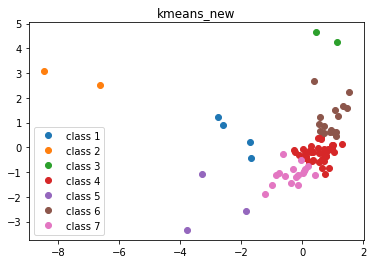

In [89]:
for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    plt.title(method)
    for i in range(n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i+1]
        plt.plot(data.Factor_1, data.Factor_2, 'o', label=f'class {i+1}')
    plt.legend()
    plt.show()

In [91]:
F.to_excel('MGK_cluster.xlsx')